In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("../input/ckdisease/kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df["age"].fillna(value=df["age"].mean(),inplace=True)
df["bp"].fillna(value=df["bp"].mean(),inplace=True)
df["sg"].fillna(value=df["sg"].mean(),inplace=True)
df["al"].fillna(value=df["al"].mean(),inplace=True)
df["su"].fillna(value=df["su"].mean(),inplace=True)

df["bgr"].fillna(value=df["bgr"].mean(),inplace=True)
df["bu"].fillna(value=df["bu"].mean(),inplace=True)
df["sc"].fillna(value=df["sc"].mean(),inplace=True)
df["sod"].fillna(value=df["sod"].mean(),inplace=True)
df["pot"].fillna(value=df["pot"].mean(),inplace=True)
df["hemo"].fillna(value=df["hemo"].mean(),inplace=True)

df["rbc"].fillna(value=df["rbc"].mode()[0],inplace=True)
df["pc"].fillna(value=df["pc"].mode()[0],inplace=True)
df["pcc"].fillna(value=df["pcc"].mode()[0],inplace=True)
df["ba"].fillna(value=df["ba"].mode()[0],inplace=True)
df["pcv"].fillna(value=df["pcv"].mode()[0],inplace=True)
df["wc"].fillna(value=df["wc"].mode()[0],inplace=True)
df["rc"].fillna(value=df["rc"].mode()[0],inplace=True)
df["htn"].fillna(value=df["htn"].mode()[0],inplace=True)
df["dm"].fillna(value=df["dm"].mode()[0],inplace=True)
df["cad"].fillna(value=df["cad"].mode()[0],inplace=True)
df["appet"].fillna(value=df["appet"].mode()[0],inplace=True)
df["pe"].fillna(value=df["pe"].mode()[0],inplace=True)
df["ane"].fillna(value=df["ane"].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [8]:
# Map text to 1/0 and do some cleaning
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop(["id","pot","rbc","su"],axis=1,inplace=True)

In [9]:
remove=[]
for i in range(len(df)):
    for j in df.columns:
        if(type(df.loc[i,j])==str):
            if('\t' in df.loc[i,j] or '\t?' in df.loc[i,j]):
                remove.append(i)

In [10]:
remove

[66, 76, 133, 162, 185, 214]

In [11]:
df.drop(remove,axis=0,inplace=True)

In [12]:
df[["pcv", "wc", "rc"]] = df[["pcv", "wc", "rc"]].apply(pd.to_numeric)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['classification'],axis=1),df[["classification"]],test_size=0.3,random_state=2)

In [14]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

In [35]:
# DNN model
model=keras.Sequential([
    keras.layers.Dense(2560,input_dim=21, activation="relu"),
    keras.layers.Dense(1280, activation="relu"),
    keras.layers.Dense(560, activation="relu"),
    keras.layers.Dense(560, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

In [36]:
history=None
with tf.device("/device:GPU:0"):
    history=model.fit(x_train,y_train,epochs=2000,validation_split=0.2,callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience=500)])

Epoch 1/2000
7/7 [==============================] - 1s 61ms/step - loss: 10.0363 - accuracy: 0.5636 - val_loss: 5.4525 - val_accuracy: 0.6182
Epoch 2/2000
7/7 [==============================] - 0s 26ms/step - loss: 4.4323 - accuracy: 0.5591 - val_loss: 2.3456 - val_accuracy: 0.6182
Epoch 3/2000
7/7 [==============================] - 0s 27ms/step - loss: 3.8568 - accuracy: 0.6000 - val_loss: 3.2233 - val_accuracy: 0.4727
Epoch 4/2000
7/7 [==============================] - 0s 27ms/step - loss: 2.3027 - accuracy: 0.5545 - val_loss: 3.9242 - val_accuracy: 0.4545
Epoch 5/2000
7/7 [==============================] - 0s 28ms/step - loss: 2.4502 - accuracy: 0.5682 - val_loss: 2.8484 - val_accuracy: 0.4727
Epoch 6/2000
7/7 [==============================] - 0s 27ms/step - loss: 1.3174 - accuracy: 0.5682 - val_loss: 0.7305 - val_accuracy: 0.6182
Epoch 7/2000
7/7 [==============================] - 0s 30ms/step - loss: 0.7408 - accuracy: 0.6500 - val_loss: 0.9482 - val_accuracy: 0.6182
Epoch 8/2000

In [37]:
prediction=model.predict(x_test)
prediction

array([[0.998549  ],
       [0.9993201 ],
       [0.9314933 ],
       [0.06919998],
       [0.00642189],
       [0.96932745],
       [0.98874545],
       [0.4144824 ],
       [0.981977  ],
       [1.        ],
       [0.9999982 ],
       [0.99961066],
       [1.        ],
       [0.9948925 ],
       [1.        ],
       [0.9754636 ],
       [0.23998001],
       [0.01073039],
       [1.        ],
       [1.        ],
       [0.10649014],
       [0.2493039 ],
       [1.        ],
       [0.03138927],
       [0.9999945 ],
       [0.6210205 ],
       [1.        ],
       [0.99999315],
       [0.00160527],
       [0.00778264],
       [0.9997389 ],
       [0.29020095],
       [0.9996647 ],
       [1.        ],
       [1.        ],
       [0.01435316],
       [0.059421  ],
       [0.99983394],
       [0.8254036 ],
       [0.20199162],
       [0.9999906 ],
       [1.        ],
       [0.00370929],
       [0.7334594 ],
       [0.99490523],
       [0.04038107],
       [1.        ],
       [0.496

Text(0.5, 1.0, 'Confusion Matrix')

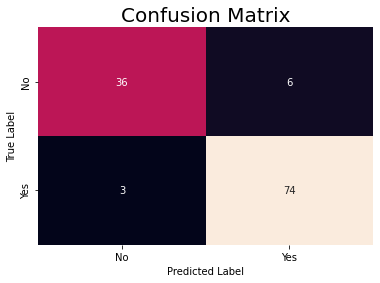

In [38]:
import seaborn as sns
cm=confusion_matrix(y_test,prediction.round())
labels=["No","Yes"]
# plt.subplots(figsize=(15,10)) 
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=20)

In [39]:
accuracy_score(y_test,prediction.round())

0.9243697478991597

In [40]:
recall_score(y_test,prediction.round(),average=None)

array([0.85714286, 0.96103896])

In [41]:
precision_score(y_test,prediction.round(),average=None)

array([0.92307692, 0.925     ])

In [42]:
model.save("model.h5")

In [43]:
history

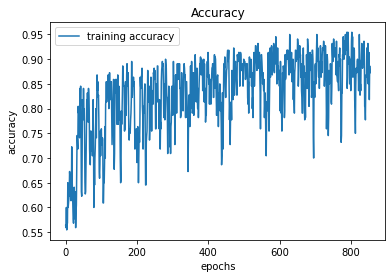

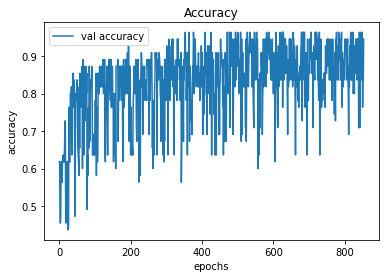

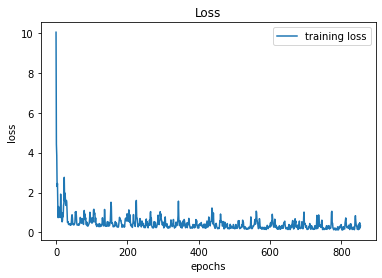

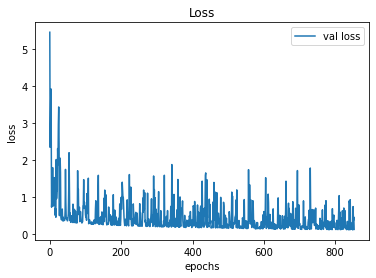

In [44]:
# plotting accuracy and loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(2)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.figure(3)
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()